In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as pl
import numpy as np
import pickle as pkl
import Recordings
import signale, trajectory
import os
from scipy.signal import argrelextrema
from scipy.signal import gaussian
from scipy.stats import pearsonr
import seaborn as sns
import signale.custom_plot as cplot
import matplotlib.patches as mpatches
import pandas as pd
import NeuroTools as NT

/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
sns.set_style('white',{'legend.frameon':True})
colors = ['#FF0000', '#0000FF', '#008000', '#00FFFF', '#FF00FF', '#EE82EE',
        '#808000', '#800080', '#FF6347', '#FFFF00', '#9ACD32', '#4B0082',
        '#FFFACD', '#C0C0C0', '#A0522D', '#FA8072', '#FFEFD5', '#E6E6FA',
        '#F1FAC1', '#C5C5C5', '#A152ED', '#FADD72', '#F0EFD0', '#EEE6FF',
        '#01FAC1', '#F5F5F5', '#A152FF', '#FAFD72', '#F0EFDF', '#EEEFFF',
        '#F1FA99', '#C9C9C9', '#A152DD', '#FA5572', '#FFFFD0', '#EDD6FF']
theme01 = ["#39855f","#ae5dd2","#5cc151","#d049a3","#9ab635","#636ad8",
           "#c7a73a","#8c519c","#4b8e38","#dc3d6f","#64c187","#d84938",
           "#3fc1bf","#e08533","#6175ba","#667228","#d18ed0","#aab069",
           "#a84f77","#60a4da","#a55528","#e48289","#8d6e2d","#ac484d",
           "#da986a"]
theme02 = ["#62c49e","#cb3da4","#5bc34e","#c86ae1","#9fbc34","#8b49b9","#4d922b",
           "#5e6cdb","#e6a83b","#605ea4","#c2b746","#e174ca","#3ac37d","#d53782",
           "#7cb968","#e54172","#3c854c","#e8405a","#47bfd4","#e5552c","#4991cd",
           "#e37d2e","#9095de","#ba9330","#b986dc","#848b2a","#9b438b","#52712a",
           "#de6ba5","#2e886e","#ce2f37","#a6b16c","#b52c49","#70692c","#dd94c7",
           "#bb7525","#a86596","#9a782c","#e76c91","#d0ab6f","#aa385b","#f0a276",
           "#8c435f","#ec7153","#865626","#eb92a2","#b0321e","#e68e83","#a94e1d",
           "#ba6371","#ab774c","#d95a5b","#cd7f53","#a75143","#e07669"]

In [5]:
popDB = pd.read_pickle('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/sleepDB/ROsleep-Rat3906-Day4.db')
rippDB = pd.read_pickle('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/Rat3906Control/dataFiles/sleepDB/RipplesTimeDB.pd')

In [99]:
rippDB = ripDB[ripDB.date=='06-03-16']

In [103]:
tR = rippDB[ripDB.epoch=='rem'].t_peak
tP = popDB[popDB.epoch == 'rem'].t_peak

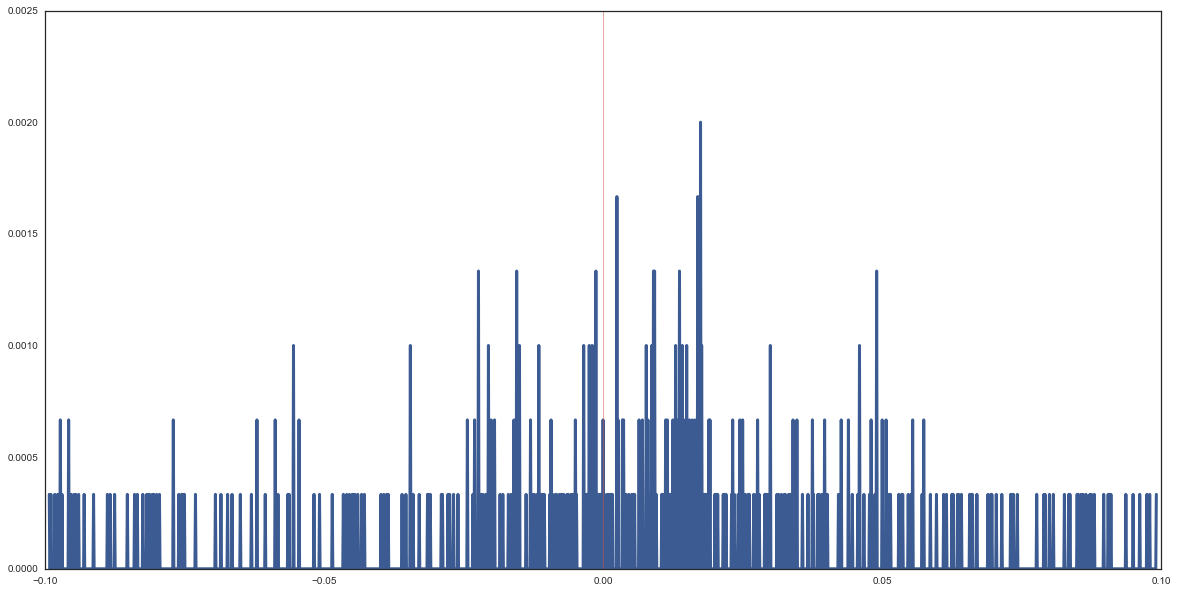

In [104]:
f,ax = pl.subplots(1,1,figsize=[20,10])
timeStampsA = tP.as_matrix()/1e3
timeStampsB = tR.as_matrix()/1e3
differences, pred, norm = NT.analysis.crosscorrelate(timeStampsA,timeStampsB,lag=0.1)
counts, bin_edges = np.histogram(differences,2000)
edge_distances = np.diff(bin_edges)
bin_centers = bin_edges[1:] - edge_distances/2
counts = counts / norm
xlabel = "Time"
ylabel = "Cross-correlation coefficient"
ax.plot(bin_centers, counts, sns.xkcd_rgb["denim blue"], lw=3)
ax.axvline(0,linewidth=0.5,c=sns.xkcd_rgb["pale red"])
#ax.set_title(str(t[0]+1)+'vs.'+str(t[1]+1),fontsize=30)

(-0.1, 0.1)

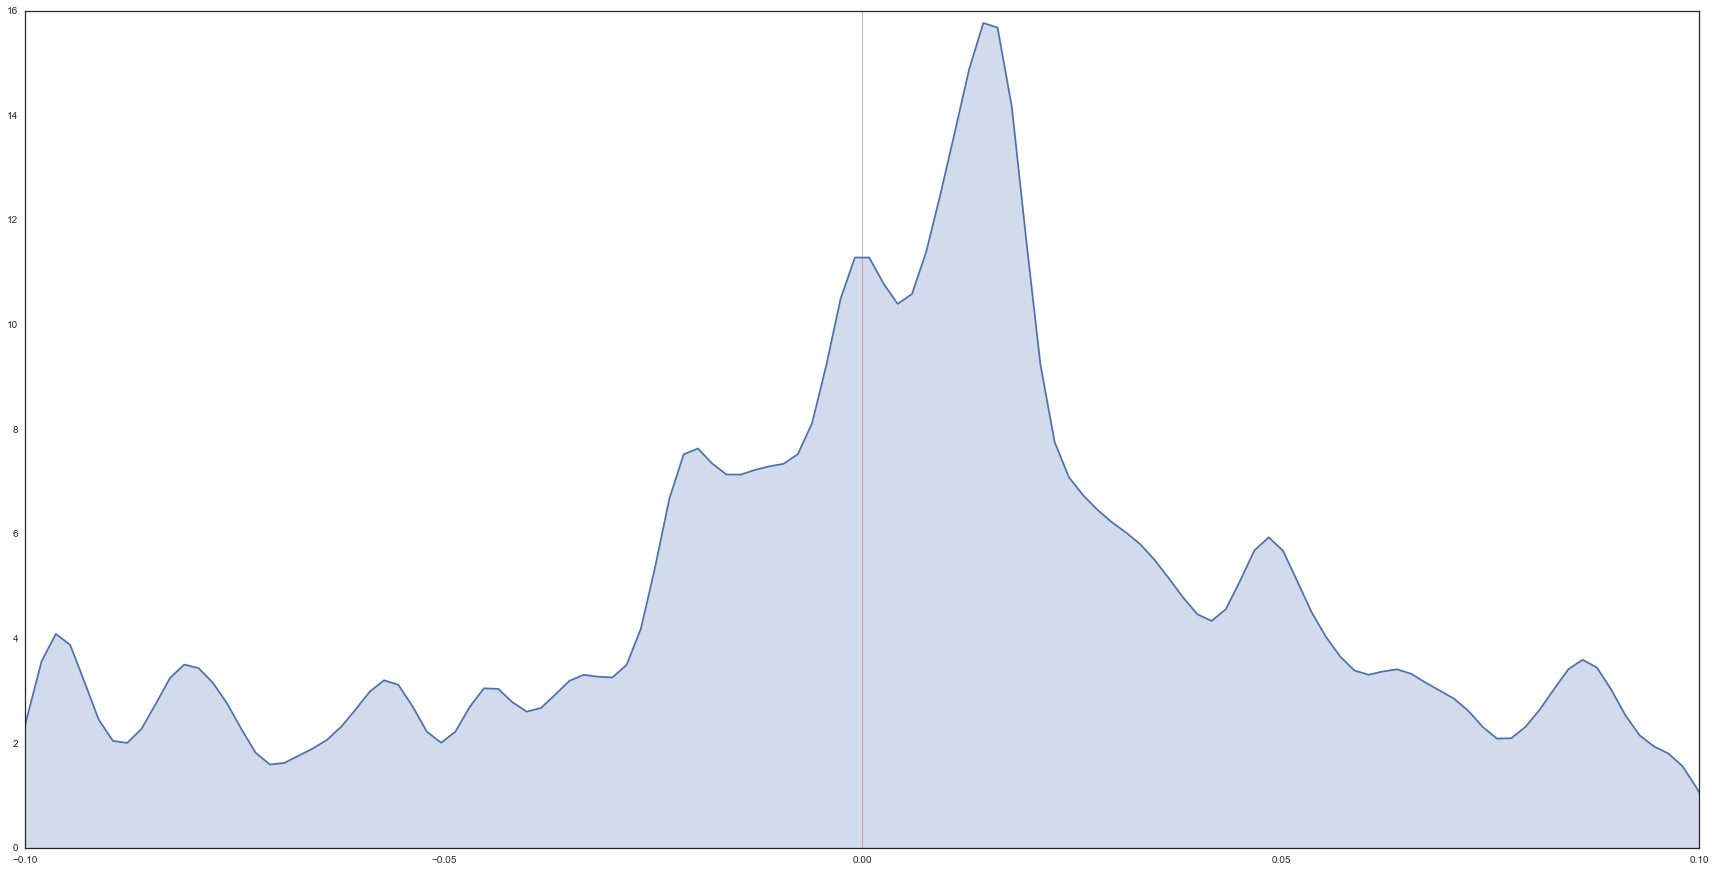

In [105]:
f,ax = pl.subplots(1,1,figsize=[30,15])
sns.kdeplot(differences,shade=True,bw=3e-3)
ax.axvline(0,linewidth=0.5,c=sns.xkcd_rgb["pale red"])
ax.set_xlim([-0.1,0.1])

In [10]:
%matplotlib
pl.scatter(rippDB.wPC2,rippDB.wPC1,c=ccc,alpha=0.3,s=50)

Using matplotlib backend: Qt4Agg


In [7]:
ccc = np.array(theme01)[rippDB.wc.as_matrix()]